In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import copy

from scipy.stats import truncnorm, norm, levene, ttest_ind
from tensorflow.math import sigmoid

* Sigmoid: $\textstyle\large \sigma(x) = \frac{1}{1+e^{-x}}$  
* tanh: $\textstyle\large \tanh(x) = \frac{e^x-e^{-x}}{e^x+e^{-x}}$

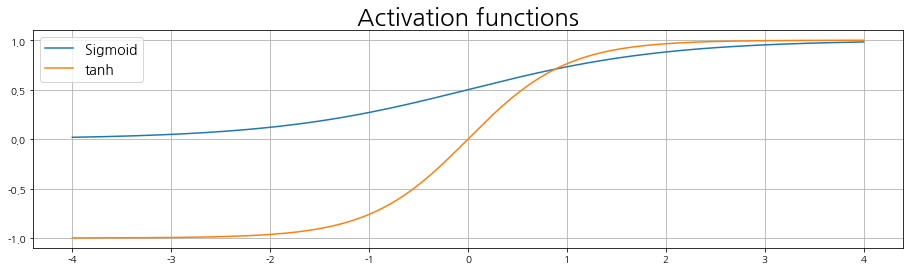

In [35]:
lim = 4

x=np.linspace(-lim, lim, 2000)
sigmoid_samp = sigmoid(x).numpy()
tanh_samp = np.tanh(x)

plt.figure(figsize=(16,4))
plt.gca().set_aspect(1)
plt.plot(x, sigmoid_samp, label='Sigmoid')
plt.plot(x, tanh_samp, label='tanh')

plt.yticks(np.linspace(-1., 1, 5))
plt.grid(True)
plt.legend(fontsize=14)
plt.title('Activation functions', fontsize=24)
plt.show()

# Rectifiers

* ReLU(Rectified Linear Unit): $\large f(x) = \mathrm{max}\{0, x\}$
* ELU(Exponential Linear Unit): $\textstyle \large f(x) = \normalsize \begin{cases} \alpha(e^x-1) & \text{if}\ x\leq0\\ x & \text{if}\ x>0 \end{cases}$  
* GELU(Gaussian Error Linear Unit): $\textstyle \large f(x)=x \cdot \Phi(x) = \normalsize x\cdot \frac{1}{2}\left[1+\mathrm{erf}\left(\frac{x}{\sqrt{2}}\right)\right]$  
* SiLU(Sigmoid Linear Unit): $\large f(x) = x\cdot \mathrm{sigmoid}(x)$  
* Softplus: $\large f(x) = \ln{(1+e^x)}$  

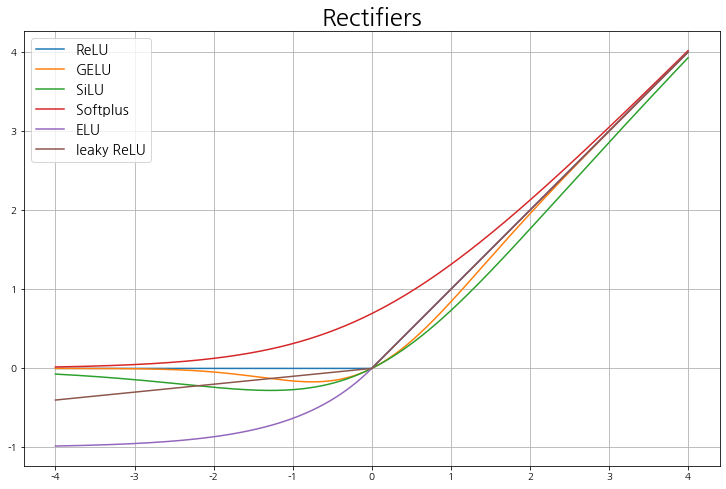

In [29]:
lim = 4

x=np.linspace(-lim, lim, 2000)
norm_cdf = norm.cdf(x,loc=0, scale=1)
relu = np.vectorize(lambda x: max(x, 0.))(x)
gelu = x*norm_cdf
silu = x*(1/(1+np.exp(-x)))
softplus = np.log(1+np.exp(x))
elu = np.vectorize(lambda x: np.exp(x)-1 if x<0 else x)(x)

plt.figure(figsize=(16,8))
plt.gca().set_aspect(1)
plt.plot(x, relu, label = 'ReLU')
plt.plot(x, gelu, label='GELU')
plt.plot(x, silu, label='SiLU')
plt.plot(x, softplus, label='Softplus')
plt.plot(x, elu, label='ELU')
plt.plot([-lim,0,lim], [-lim*.1,0,lim], label='leaky ReLU')
plt.grid(.1, )
plt.legend(fontsize=14)
plt.title('Rectifiers', fontsize=24)
plt.show()